In [69]:
%pip install pandas numpy matplotlib seaborn scikit-learn scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
# Load the dataset
wine = pd.read_csv('wine.csv')

# Rename columns for better understanding
wine.rename(columns={
    wine.columns[0]: 'Al',
    wine.columns[1]: 'Mal',
    wine.columns[3]: 'Alc',
    wine.columns[5]: 'TotP',
    wine.columns[6]: 'Flav',
    wine.columns[7]: 'NFlav',
    wine.columns[8]: 'Pro',
    wine.columns[11]: 'OD',
    wine.columns[4]: 'Mg',
    wine.columns[9]: 'Color',
    wine.columns[12]: 'Prl'
}, inplace=True)#

# Select only relevant columns
wineSelec = wine[['Al', 'Color', 'Flav', 'Mal', 'Alc', 'OD', 'TotP', 'NFlav']]
print(wineSelec.columns)

# Display basic information
print(wineSelec.info())
print(wineSelec.describe())


Index(['Al', 'Color', 'Flav', 'Mal', 'Alc', 'OD', 'TotP', 'NFlav'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Al      178 non-null    float64
 1   Color   178 non-null    float64
 2   Flav    178 non-null    float64
 3   Mal     178 non-null    float64
 4   Alc     178 non-null    float64
 5   OD      178 non-null    float64
 6   TotP    178 non-null    float64
 7   NFlav   178 non-null    float64
dtypes: float64(8)
memory usage: 11.3 KB
None
               Al       Color        Flav         Mal         Alc          OD  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean    13.000618    5.058090    2.029270    2.336348   19.494944    2.611685   
std      0.811827    2.318286    0.998859    1.117146    3.339564    0.709990   
min     11.030000    1.280000    0.340000    0.740000   10.600000    1.2

In [71]:
# Calculate the correlation matrix
correlation_matrix = wineSelec.corr()

# Display the correlation matrix
print(correlation_matrix)

             Al     Color      Flav       Mal       Alc        OD      TotP  \
Al     1.000000  0.546364  0.236815  0.094397 -0.310235  0.072343  0.289101   
Color  0.546364  1.000000 -0.172379  0.248985  0.018732 -0.428815 -0.055136   
Flav   0.236815 -0.172379  1.000000 -0.411007 -0.351370  0.787194  0.864564   
Mal    0.094397  0.248985 -0.411007  1.000000  0.288500 -0.368710 -0.335167   
Alc   -0.310235  0.018732 -0.351370  0.288500  1.000000 -0.276769 -0.321113   
OD     0.072343 -0.428815  0.787194 -0.368710 -0.276769  1.000000  0.699949   
TotP   0.289101 -0.055136  0.864564 -0.335167 -0.321113  0.699949  1.000000   
NFlav -0.155929  0.139057 -0.537900  0.292977  0.361922 -0.503270 -0.449935   

          NFlav  
Al    -0.155929  
Color  0.139057  
Flav  -0.537900  
Mal    0.292977  
Alc    0.361922  
OD    -0.503270  
TotP  -0.449935  
NFlav  1.000000  


In [72]:
# Find correlations between 0.7 and 1.0, and -0.7 and -1.0
high_corr = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# Omit self-correlations
np.fill_diagonal(high_corr.values, np.nan)

# Display the results
print(high_corr)    
print("Strongest correlations found between alcohol, flavanoids, OD280/OD315 of diluted wines, nonflavanoid phenols, and total phenols")

             Al     Color      Flav  Mal  Alc        OD      TotP    NFlav
Al          NaN  0.546364       NaN  NaN  NaN       NaN       NaN      NaN
Color  0.546364       NaN       NaN  NaN  NaN       NaN       NaN      NaN
Flav        NaN       NaN       NaN  NaN  NaN  0.787194  0.864564 -0.53790
Mal         NaN       NaN       NaN  NaN  NaN       NaN       NaN      NaN
Alc         NaN       NaN       NaN  NaN  NaN       NaN       NaN      NaN
OD          NaN       NaN  0.787194  NaN  NaN       NaN  0.699949 -0.50327
TotP        NaN       NaN  0.864564  NaN  NaN  0.699949       NaN      NaN
NFlav       NaN       NaN -0.537900  NaN  NaN -0.503270       NaN      NaN
Strongest correlations found between alcohol, flavanoids, OD280/OD315 of diluted wines, nonflavanoid phenols, and total phenols


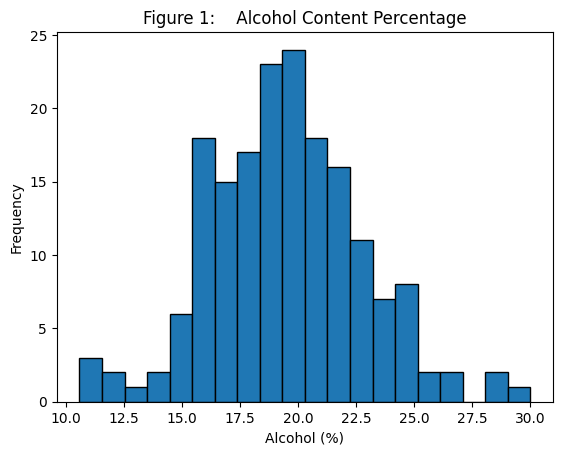

In [73]:
plt.hist(wineSelec['Alc'], bins=20, edgecolor='black')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frequency')
plt.title('Figure 1:    Alcohol Content Percentage')
plt.show()

In [75]:
import scipy

mean_al = round(np.mean(wineSelec['Al']), 2)
median_al = round(np.median(wineSelec['Al']), 2)
mode_al = round(scipy.stats.mode(wineSelec['Al'])[0], 2)
print(f"Mean: {mean_al}")
print(f"Median: {median_al}")
print(f"Mode: {mode_al}")

Mean: 13.0
Median: 13.05
Mode: 12.37


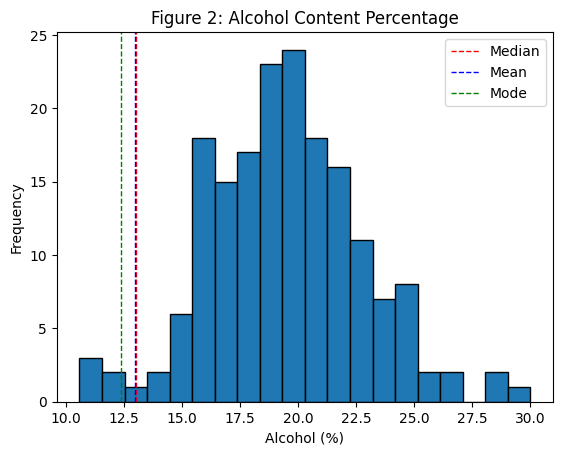

In [78]:
plt.hist(wineSelec['Alc'], bins=20, edgecolor='black')
plt.axvline(median_al, color='red', linestyle='dashed', linewidth=1, label='Median')
plt.axvline(mean_al, color='blue', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(mode_al, color='green', linestyle='dashed', linewidth=1, label='Mode')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frequency')
plt.title('Figure 2: Alcohol Content Percentage')
plt.legend()
plt.show()

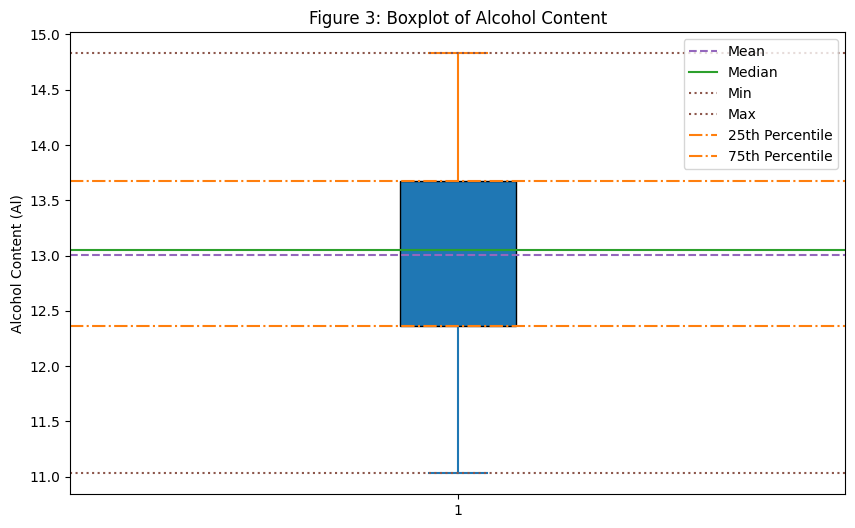

In [80]:
# Create a boxplot for the 'Al' column
plt.figure(figsize=(10, 6))
box = plt.boxplot(wineSelec['Al'], patch_artist=True)

# Set colors for different parts of the boxplot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Color the box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Color the whiskers
for whisker, color in zip(box['whiskers'], colors[:2]):
    whisker.set_color(color)
    whisker.set_linewidth(1.5)

# Color the caps
for cap, color in zip(box['caps'], colors[:2]):
    cap.set_color(color)
    cap.set_linewidth(1.5)

# Color the medians
for median, color in zip(box['medians'], colors[2:3]):
    median.set_color(color)
    median.set_linewidth(1.5)

# Color the fliers
for flier, color in zip(box['fliers'], colors[3:4]):
    flier.set(marker='o', color=color, alpha=0.5)

# Add mean, median, min, max, 25th and 75th percentiles
mean_al = np.mean(wineSelec['Al'])
median_al = np.median(wineSelec['Al'])
min_al = np.min(wineSelec['Al'])
max_al = np.max(wineSelec['Al'])
percentile_25 = np.percentile(wineSelec['Al'], 25)
percentile_75 = np.percentile(wineSelec['Al'], 75)

plt.axhline(mean_al, color=colors[4], linestyle='--', linewidth=1.5, label='Mean')
plt.axhline(median_al, color=colors[2], linestyle='-', linewidth=1.5, label='Median')
plt.axhline(min_al, color=colors[5], linestyle=':', linewidth=1.5, label='Min')
plt.axhline(max_al, color=colors[5], linestyle=':', linewidth=1.5, label='Max')
plt.axhline(percentile_25, color=colors[1], linestyle='-.', linewidth=1.5, label='25th Percentile')
plt.axhline(percentile_75, color=colors[1], linestyle='-.', linewidth=1.5, label='75th Percentile')

# Add legend
plt.legend()

# Set labels and title
plt.ylabel('Alcohol Content (Al)')
plt.title('Figure 3: Boxplot of Alcohol Content')

# Show plot
plt.show()

In [81]:
# Calculate skewness and kurtosis for the 'Al' column
skewness_al = stats.skew(wineSelec['Al'])
kurtosis_al = stats.kurtosis(wineSelec['Al'])

print(f"Skewness: {skewness_al}")
print(f"Kurtosis: {kurtosis_al}")

Skewness: -0.05104747165391963
Kurtosis: -0.8622600987701743


In [83]:
# Calculate variance and standard deviation using numpy
variance_np = round(np.var(wineSelec['Al']),2)
std_dev_np = round(np.std(wineSelec['Al']), 2)

print(f"Variance: {variance_np}")
print(f"Standard Deviation: {std_dev_np}")


Variance: 0.66
Standard Deviation: 0.81


Q1: 12.362499999999999
Q2 (Median): 13.05
Q3: 13.6775
IQR: 1.3150000000000013


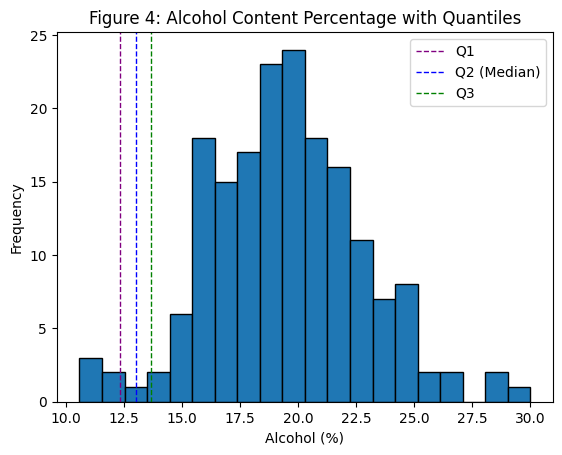

In [85]:
# Calculate quantiles and IQR
q1 = np.percentile(wineSelec['Al'], 25)
q2 = np.percentile(wineSelec['Al'], 50)
q3 = np.percentile(wineSelec['Al'], 75)
iqr = q3 - q1

print(f"Q1: {q1}")
print(f"Q2 (Median): {q2}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

# Plot histogram with quantiles
plt.hist(wineSelec['Alc'], bins=20, edgecolor='black')
plt.axvline(q1, color='purple', linestyle='dashed', linewidth=1, label='Q1')
plt.axvline(q2, color='blue', linestyle='dashed', linewidth=1, label='Q2 (Median)')
plt.axvline(q3, color='green', linestyle='dashed', linewidth=1, label='Q3')
plt.xlabel('Alcohol (%)')
plt.ylabel('Frequency')
plt.title('Figure 4: Alcohol Content Percentage with Quantiles')
plt.legend()
plt.show()